# Workshop 1 - Introduction to RDKit Molecules, Substrcuture Searching, Molecular Fingerprints, Similarity and Descriptors

<strong>Author(s):</strong> Neil Berry, based on work from Jessica A. Nash, The Molecular Sciences Software Institute (https://github.com/MolSSI-Education/)

<div class="alert alert-block alert-info">
<h2>Overview</h2>

* Use RDKit to create molecules in Python

</div>

There are Python libraries that are chemically aware. One commonly used library in Python for cheminformatics is called [RDKit](https://en.wikipedia.org/wiki/RDKit). RDKit is an open-source cheminformatics library, primarily developed in C++ and has been under development since the year 2000. We will be using the Python interface to RDKit, though there are interfaces in other languages.

RDKit provides a molecule object that allows you to manipulate chemical structures. It has capabilities for reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation. This notebook introduces RDKit basics.

There are adiditonal resources RDKit [CookBook](https://www.rdkit.org/docs/Cookbook.html) and full [documentation](https://www.rdkit.org/docs/index.html). There are also some tutorials at [TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/talktorials.html) and [An introduction to cheminformatics, data analysis and machine learning](https://www.rsccicag.org/previous%20meetings.htm).

<div class="alert alert-block alert-success">
<strong>Python Skills: Python Objects</strong>

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods.
One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`.
You access information about objects with the syntax
```python
object.data
```
where data is the attribute name.

You access object methods with the syntax
```python
object.method(arguments)
```

For example, for a list "`append` is a method that was covered in the introductory lesson.

```
my_list = []
my_list.append(1) # "append" is a method
```
</div>    



## Jupyter Notebooks

Here are some steps to get started with Jupyter notebooks:

•	Running code: In a Jupyter notebook, you can write and run code in cells. To run a cell, simply click on it and press Shift + Enter or click the "Run" button in the toolbar.

•	Markdown cells: In addition to code cells, there are also Markdown cells which have descriptive text. You can format the text using Markdown syntax to add headings, lists, links, etc..

•	Saving and exporting: To save your notebook, click on the "Save" button in the toolbar. Jupyter notebooks have the extension .ipynb and can be exported to other formats like HTML, PDF, etc.

•	Keyboard Shortcuts: Jupyter notebooks have several keyboard shortcuts that can make your work faster and more efficient. For example, keyboard shortcuts are: b for creating a cell below the current cell, a for creating a cell above the current cell, dd for deleting the current cell.

In [19]:
# If you do not have scikit-learn installed, uncomment the following line
# !conda install -y -c conda-forge scikit-learn

In this notebook, we will create and manipulate RDKit `mol` objects. RDKit `mol` objects represent molecules and have
attributes (data) and methods (actions) associated with molecules.

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to import it.

In [20]:
from rdkit import Chem

from rdkit.Chem.Draw import IPythonConsole as ipc
from rdkit.Chem import Draw

# Configuration for displaying in Jupyter notebooks
ipc.ipython_useSVG = True  # Use SVG for higher quality images
ipc.drawOptions.addAtomIndices = True  # Show atom indices
ipc.molSize = 250,250 # Set size of image

## SMILES Representation of Molecules

SMILES stands for "Simplified Molecular-Input Line-Entry System" and is a way to represent molecules as a string of characters.

We looked at SMILES in notebook 1. You can read more about SMILES at [this tutorial](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html), but rules for atoms and bonds are also repeated below.

### Atoms
SMILES supports all elements in the periodic table. An atom is represented using its respective atomic symbol. Upper case letters refer to non-aromatic atoms; lower case letters refer to aromatic atoms. If the atomic symbol has more than one letter the second letter must be lower case.

### Bonds
```
-	Single bond
=	Double bond
#	Triple bond
*	Aromatic bond
.	Disconnected structures
```
Single bonds are the default and therefore need not be entered. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical ethane. It is also assumed that the bond between two lower case atom symbols is aromatic. A blank terminates the SMILES string.

### Branches

A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis. Some examples:

```

CC(O)C	2-Propanol
CC(=O)C	2-Propanone
```

### Rings

A ring is specified by placing a number directly after the SMILES symbol where the ring closure occurs. This number acts as a marker, indicating that the atoms with the same number are connected, thus forming a ring. For instance:

```
C1CCCC1 cyclopentane
n1ccccc1	Pyridine
```

### Using Online Resources
Most of the time, you will not need to write a SMILES string by hand. You will be able to look up a molecule's SMILES string from a web database like [PubChem](https://pubchem.ncbi.nlm.nih.gov/) or it they will be provided in a file.

You can also use tools like this [molecule sketcher from the Protein Data Bank](https://www.rcsb.org/chemical-sketch) to draw molecules and get their SMILES strings.

### Other Molecular File Formats

Molecules can also be represented using a number of different file formats. As you work more in chemistry, you may see a number of these. Sometimes you will have to pick a file format based on the software you are using or the molecular information you want to save. 

| File Format | Description                                                                 | Features                                                              | Common Uses                              |
|-------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------|------------------------------------------|
| SMILES      | Simplified Molecular Input Line Entry System                                | Line notation for representing molecular structures                   | Database               |
| InChI       | International Chemical Identifier                                           | Textual identifier for chemical substances                            | Databases             |
| MOL/SDF     | MDL MOLfile and Structure-Data File                                         | Contains 2D/3D coordinates, atoms, bonds                              | Structure visualization, cheminformatics |
| PDB         | Protein Data Bank format                                                    | Often used for 3D structures of proteins and nucleic acids,but can also be used for small molecules. Often does not contain molecule information, and cannot store partial charges.                           | Structural biology, bioinformatics       |
| XYZ         | Cartesian coordinates                                                       | Simple text format with atom types and 3D coordinates                 | Computational chemistry, molecular dynamics |     |
| CIF         | Crystallographic Information File                                           | Text file format for representing crystal structure data              | Crystallography                          |
| PQR         | Extended PDB format with partial charges and radii                          | Includes atomic coordinates, partial charges, and radii               | Electrostatics calculations              |
| PDBQT       | PDB format with torsion angles and charges used in AutoDock                 | Includes atomic coordinates, partial charges, torsion angles          | Molecular docking                        |
|MOL2   |Tripos Mol2 format|	Contains atomic coordinates, bonds, molecule types, substructures, and partial charges|	Molecular modeling, cheminformatics, computational chemistry


## Creating Molecules with RDKit

To get information about molecules in RDKit, we have to first create objects representing molecules. RDKit has a molecule object that can be used to retrieve information or calculate properties. To create a molecule object, we have to communicate the molecule identity in a way that computers understand.

We will use SMILES strings to create our objects, though RDKit also has methods for creating molecules from the file formats listed in the previous notebook.

### Creating molecules using SMILES

In the lectures we have been introduced to molecular representations using SMILES strings. Now we will use SMILES strings to create molecule objects in RDKIT.

We can create a representation of methane using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [ ]:
# TO DO: Enter a capital C between the quote marks in the parentheses

methane = Chem.MolFromSmiles("")

The `methane` variable is now an RDKit "molecule object".

In a Jupyter environment, putting a variable that is an RDKit molecule as the only or last thing in a cell,
will result in a picture of the molecule as an output.

In [22]:
methane

In [ ]:
# TO DO: Enter a capital CC between the quote marks in the parentheses

ethane = Chem.MolFromSmiles("")
ethane

<div class="alert alert-block alert-warning">
<h3>Check Your Understanding</h3>
<p> Create RDKit molecules for the following molecules. You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a>:
<p>
    <ul>
        <li> Propane
        <li> Ethene
        <li> Cyclohexane
        <li> Benzene </li>
        <li> Acetic Acid
    </ul>
</p>
<p>Create variables for each molecule. The variable names should be the molecule name (all lowercase)</p>
</div>


In [ ]:
# TO DO: Enter the SMILES string for propane, ethene, cyclohexane, benzene, and acetic acid
# between the quote marks in the parentheses

propane = Chem.MolFromSmiles("")
ethene = Chem.MolFromSmiles("")
cyclohexane = Chem.MolFromSmiles("")
benzene = Chem.MolFromSmiles('')
acetic_acid = Chem.MolFromSmiles("")

In [ ]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
propane

In [ ]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
ethene

In [ ]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
cyclohexane

In [ ]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
benzene

In [ ]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
acetic_acid

## Working with RDKit Molecules

RDKit molecule objects have a number of methods we can use to get more information about the molecule.
In the next few cells, we'll look at some methods that can tell us some things about the molecules we've created.
The next cell has settings for modifying drawing molecules. It adds labels of atom indices and sets the image size.

In [30]:
from rdkit.Chem.Draw import IPythonConsole as ipc
from rdkit.Chem import Draw

# Configuration for displaying in Jupyter notebooks
ipc.ipython_useSVG = True  # Use SVG for higher quality images
ipc.drawOptions.addAtomIndices = True  # Show atom indices
ipc.molSize = 250,250 # Set size of image

<div class="alert alert-block alert-success">
<strong>Jupyter Skills: The Tab Key</strong>

When working with Python objects in the Jupyter notebook, you can type a variable or object name to see the methods available on that object.

In the cell below, type `acetic_acid.` (notice how there is a dot (`.`) at the end), then press the `tab` key.
A list of possible methods and attributes will come up.

Look through the methods until you find one that gives you the number of atoms in the molecule and remember to add () (open and close brackets) after it.

</div>

In [ ]:
# Pick a method that will tell you the number of atoms acetic acid has
# TO DO: Type a full stop after acetic_acid and look for a function that will give you the number of atoms in the molecule

x = acetic_acid

print('Acetic acid has', x, 'heavy atoms.')

<div class="alert alert-block alert-success">
<strong>Python Skills: Getting Help</strong>

Is this the number of atoms you expected for a benzene molecule?

We can use the `help` function on the method you found in the previous step to find a method argument to figure out a method argument to get the number of atoms we expect.

</div>

In [32]:
help(acetic_acid)

Help on Mol in module rdkit.Chem.rdchem object:

class Mol(Boost.Python.instance)
 |  The Molecule class.
 |
 |  In addition to the expected Atoms and Bonds, molecules contain:
 |    - a collection of Atom and Bond bookmarks indexed with integers
 |        that can be used to flag and retrieve particular Atoms or Bonds
 |        using the {get|set}{Atom|Bond}Bookmark() methods.
 |
 |    - a set of string-valued properties. These can have arbitrary string
 |        labels and can be set and retrieved using the {set|get}Prop() methods
 |        Molecular properties can be tagged as being *computed*, in which case
 |          they will be automatically cleared under certain circumstances (when the
 |          molecule itself is modified, for example).
 |        Molecules also have the concept of *private* properties, which are tagged
 |          by beginning the property name with an underscore (_).
 |
 |  Method resolution order:
 |      Mol
 |      Boost.Python.instance
 |      builtins

In [ ]:
# TO DO: Assign a variable for the number of heavy atoms in acetic acid

x = 

# TO DO: Insert the expression  onlyExplicit = False  inside the parentheses so that it will include hydrogens.

y = 

print(f"There are {x} heavy atoms in acetic acid and {y} total atoms in acetic acid.")

There are 4 heavy atoms in acetic acid and 8 total atoms in acetic acid.


Each molecule is made up of RDKit atom objects and RDKit bond objects.
If we want to get the atoms for a particular molecule, we can use the `GetAtoms` method.

In [34]:
acetic_acid_atoms = acetic_acid.GetAtoms()
print(acetic_acid_atoms)

<div class="alert alert-block alert-success">
<strong>Python Skills: Iterators</strong>

When we look at the results of the `GetAtoms` method, it tells us that we have a `GetAtomsIterator`.
In Python, an iterator is an object that contains values that can be looped through and indexed in.

Although we haven't used this terminology before, a Python list is an example of an iterator.

</div>

Like a list, we can also call `len` on the iterator.


In [35]:
len(acetic_acid_atoms)

4

Because `acetic_acid_atoms` is an iterator, we can use indexing to get a particular atom.
Atoms in RDKit molecules are represented by Atom objects.

In [36]:
atom = acetic_acid_atoms[0]
atom

When we examine one atom, we see there that there are many methods associated with the atom.
For example, we can print the atom element or atom hybridization.

In [ ]:
# TO DO: Type a . after atom and look for a method that will print out the symbol for the atom

print(atom.GetSymbol())

# TO DO: Type a . after atom and look for a method that will tell you the hydridization of the atom

print(atom.GetHybridization())

We can use a for loop to give information about each atom.

In [38]:
for atom in acetic_acid_atoms:                                                      # We can do this because acetic_acid_atoms is an iterator
    print(f"Atom {atom.GetSymbol()} has hybridization {atom.GetHybridization()}")

Atom C has hybridization SP3
Atom C has hybridization SP2
Atom O has hybridization SP2
Atom O has hybridization SP2


Bonds are also objects in RDKit, and we can iterate over them the same way we can iterate over atoms.

In [39]:
acetic_acid_bonds = acetic_acid.GetBonds()
bond = acetic_acid_bonds[0]

In [ ]:
bond.GetBondType()

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Use a `for` loop to print information about each bond.
For each bond, you should print the starting atom symbol, the ending atom symbol,
and the bond type.

Your output should look like the following:

```
Bond between C and C is a SINGLE bond.
Bond between C and O is a DOUBLE bond.
Bond between C and O is a SINGLE bond.
```

</div>

In [ ]:
for bond in acetic_acid_bonds:
    start_atom = bond
    end_atom = bond
    bond_type = bond
    print(f"Bond between {start_atom.GetSymbol()} and {end_atom.GetSymbol()} is a {bond_type} bond.")


Bond between C and C is a SINGLE bond.
Bond between C and O is a DOUBLE bond.
Bond between C and O is a SINGLE bond.


## Editing Atoms with RDKit

In addition to seeing information about atoms and bonds in our molecule, we can also use RDKit to change our molecule structure.
Let's consider benzene for our example. We will change one of the carbons in the benzene ring to a nitrogen to make pyridine.

We are going to create a copy of our benzene molecule using another function from RDKit called `RWMol`. `RWMol` makes our molecule readable and writeable (or "editable").

In [ ]:
# TO DO: we will create pyridine from benzene, an RDKit mol object we already created in this noteobook

pyridine = Chem.RWMol(benzene)

pyridine                            # but you can see it's still benzene, not pyridine

One way we can change molecules in RDKit is to set the atomic number of a particular atom to another number.
To change one of the carbons in our ring to nitrogen, we can select one of the atoms and then set its atomic number to that of nitrogen (7).

In [ ]:
# TO DO: Get atom with index 0 (labeled 0 above)

atom = pyridine.GetAtomWithIdx()

# TO DO: Set the atomic number to 7

atom.SetAtomicNum()

pyridine

In [ ]:
Chem.MolToSmiles(pyridine)

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Change another atom in the pyridine ring to create [pyrimidine](https://en.wikipedia.org/wiki/Pyrimidine).

</div>

In [ ]:
# TO DO: Create pyrimidine by starting with pyridine

pyrimidine = 

# TO DO: Get atom with index 2 (labeled 2 above)

atom = pyrimidine.GetAtomWithIdx()

# TO DO: Set the atomic number to 7

atom.SetAtomicNum()

pyrimidine

## Combining two molecules

We can also create and combine molecules using RDKit. This approach might be necessary when we want to add a more complex functional group. In the example below we create a carboxyl group and add it to benzene to make benzoic acid.

First we create the molecule for our functional group.

In [ ]:
carboxyl = Chem.MolFromSmiles('C(=O)O')
carboxyl

Next, we combine the two molecules together using the `CombineMols` function.

In [ ]:
combined = Chem.CombineMols(benzene, carboxyl)
combined

After the combining, we have to make our combined molecules editable so that we can change the bonds and atoms.

In [ ]:
editable_mol = Chem.RWMol(combined)
editable_mol

Finally, we can use `AddBonds` to add a bond between the carbon on our carboxyl group (6) to an atom on benzene. We could have picked any carbon, but the example below uses index 5.

In [48]:
editable_mol.AddBond(0, 6, order=Chem.rdchem.BondType.SINGLE)

9

In [ ]:
editable_mol

<div class="alert alert-block alert-info">
<strong>Molecular Sanitization</strong>

When a molecule is loaded into RDKit, a ["molecular sanitization"](https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization) step typically takes place.
Molecular sanitization ensures that molecules are "reasonable":that they can be represented with octet-complete Lewis dot structures.
</div>

After we add new atoms like this, our molecule usually needs to be "sanitized". One way we can tell this is by viewing the molecule above. Our aromatic ring structure is now symbolized with a dotted line inside of the ring. We will want to use the `Chem.SanitizeMol` method to sanitize the molecule.
The step of sanitiziation that is important in this case is the `Kekulize` step, where aromatic rings are converted to the Kekule form. A Python error (exception) would occur if a problem is found with aromaticity.

In [ ]:
Chem.SanitizeMol(editable_mol)
editable_mol

<div class="alert alert-block alert-warning">
<h2>Exercise</h2>

[Protein phoshorylation](https://www.thermofisher.com/us/en/home/life-science/protein-biology/protein-biology-learning-center/protein-biology-resource-library/pierce-protein-methods/phosphorylation.html) refers to the additon of a phosphate group to the -OH group of an amino acid and occurs for serine, threonine, or tyrosine residues.

For this challenge, you should modify the tyrosine module (given below) to add a phosphate to the OH group.

</div>

In [ ]:
# TO DO: Go to the PubChem site to get the SMILES string for tyrosine and place it between the quote marks

tyrosine = Chem.MolFromSmiles("")
tyrosine

In [ ]:
# TO DO: Write the SMILES string for a phosphate group (phosphorous bound to 3 oxygens)

phosphate = Chem.MolFromSmiles("")
phosphate

In [ ]:
# TO DO: Place the names of the two RDKit mol objects you want to combine in the parentheses

combined2 = Chem.CombineMols()
combined2

In [ ]:
# TO DO: Make your new set of molecules editable (RW stands for Read Write)

editable_mol2 = Chem.RWMol()

In [ ]:
# TO DO: Add the bond to connect the two RDKit mol objects

editable_mol2.AddBond(, , order=Chem.rdchem.BondType.SINGLE)
editable_mol2

In [ ]:
# This will clean it up

Chem.SanitizeMol(editable_mol2)
editable_mol2

# Cheminformatics: Molecular Similarity and Molecular Descriptors


Cheminformatics is often used in the context of molecular discovery. 
For example, you might want to process a large number of molecules to find molecules that are similar to a target, or that contain a particular functional group. 
But how can you tell if two molecules are similar?

A chemist looking at two molecules might be able to make a judgment based on their chemical knowledge. However, when dealing with a large number of molecules, this problem can become intractable. There are ways to detect molecular similarity on a computer that allow fast comparison and processing of molecules. 

## Graph Representation of Molecules
Graph theory is a branch of mathematics that studies the properties and applications of graphs, which are structures made up of nodes (or vertices) connected by edges (or lines).
A molecule can be represented as a graph where atoms are nodes and bonds are edges. This representation allows the use of various graph-based algorithms to analyze molecular structures. 
The figure below (borrowed from Wikipedia) shows a graph with numbered nodes (circles) connected by edges (lines).


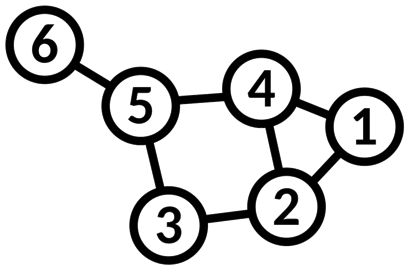)

Image from [Wikipedia: Graph theory](https://en.wikipedia.org/wiki/Graph_theory)

In a molecule the atoms would be "nodes" in the graph, while the bonds would be "edges". One can also represent bond order by changing the "weight" of graph edges. In this view, one way to tell if molecules are the same is to check that their molecular graphs are the same.

### Substructure Searches

A substructure search is a cheminformatics technique used to identify molecules that contain a specific pattern or structure within a larger molecule.

The figure below shows the beneze substructure matched in the aspirin molecule.

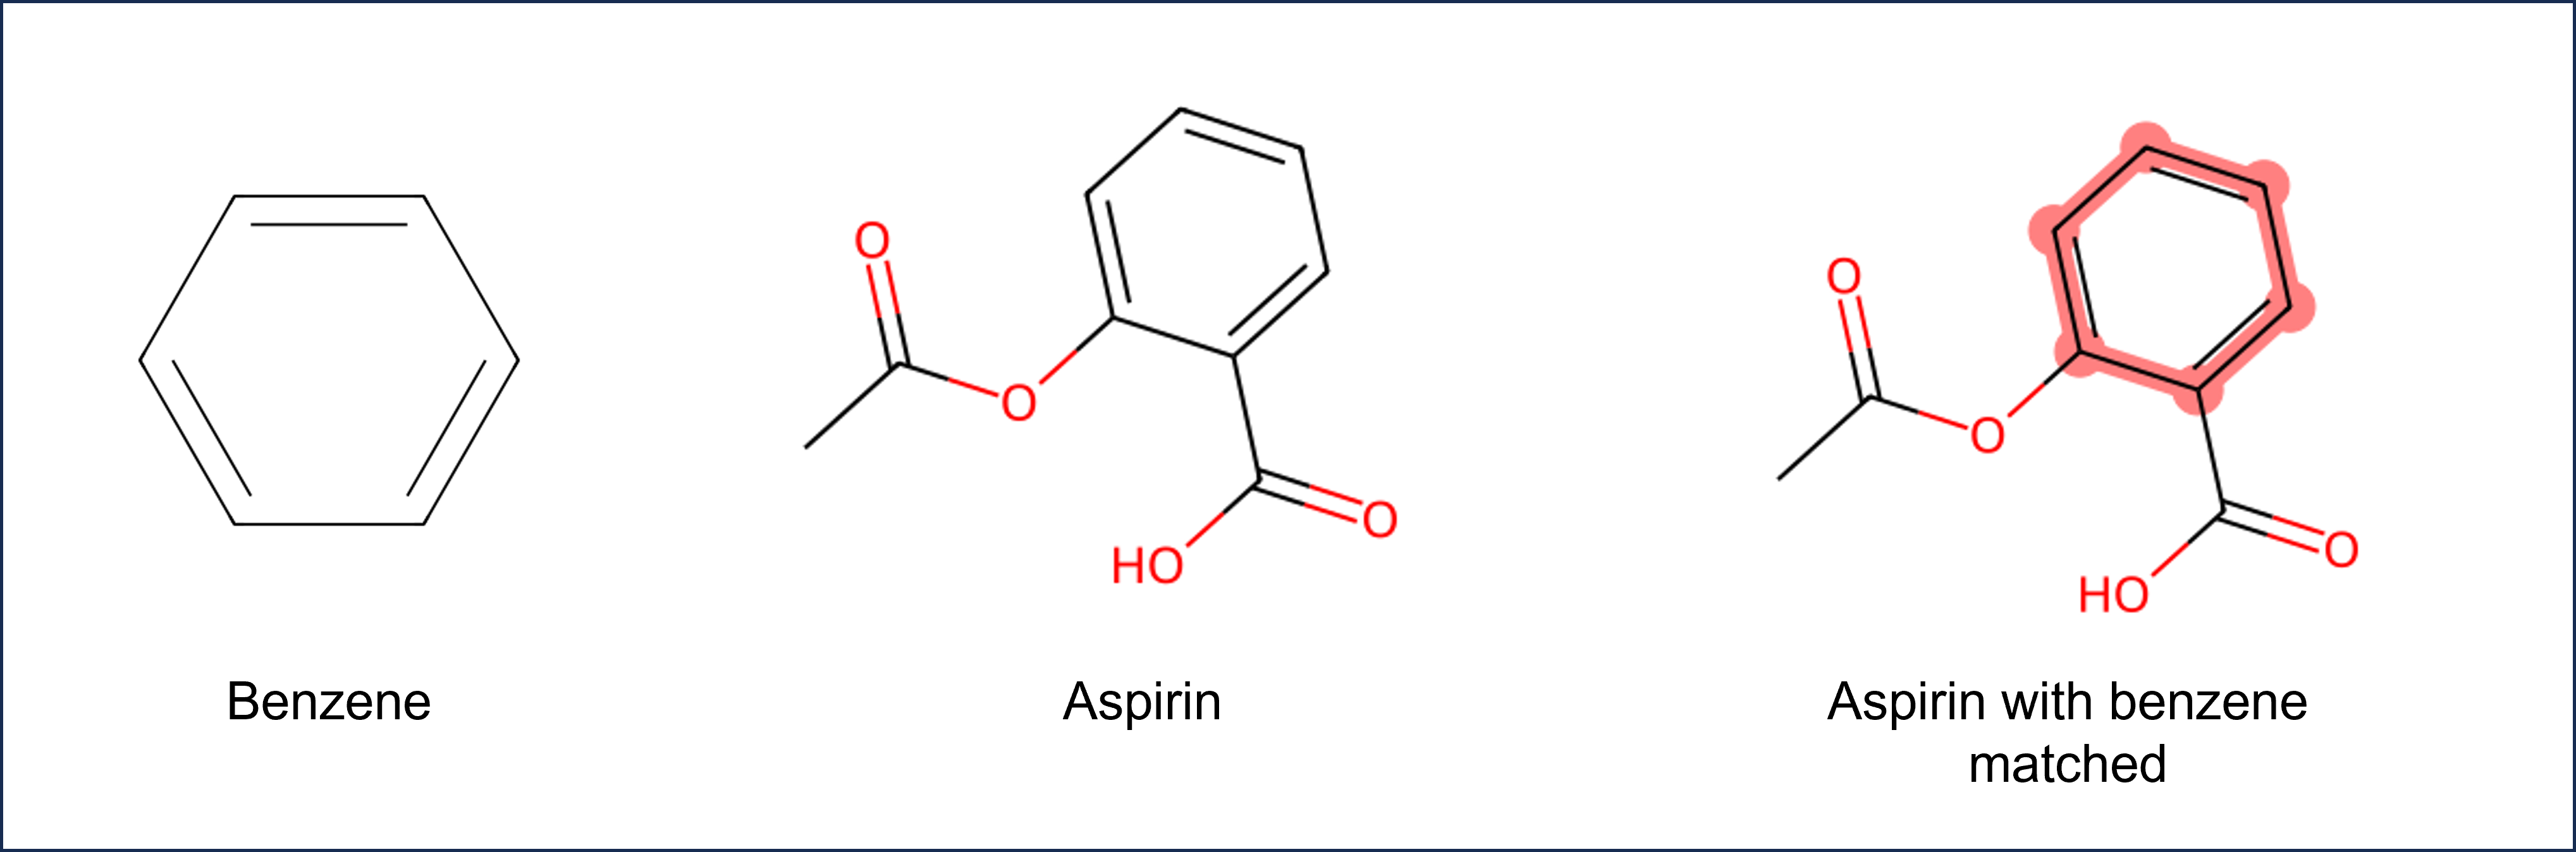


One way this can be done is with graph representaiton and graph theory. 
When doing substructure search using RDKit, it can check to see if the molecular graph for one molecule contains the molecular graph of a smaller molecule.
This is a concept called "subgraph isomorphism".

You don't have to fully understand it in order to do a substructure search.

In the cells below, we demonstrate searching molecules for a smaller structure using substructure search. 
As you can see from the cells, this functionality is very nicely built into RDKit.


In [ ]:
from rdkit import Chem

caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
carbonyl = Chem.MolFromSmiles('C=O')

matches = caffeine.GetSubstructMatches(carbonyl)

caffeine


As you can see above, we can define two molecules and search for one inside of the other. 

<div class="alert alert-block alert-warning"> 
<h3>Exercise</h3>

Using the skills you've learned already, perform a substructure search for methyl groups (use C as the smiles string for now) in caffeine in the cell below.

</div>

In [ ]:
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
methyl_pattern = Chem.MolFromSmiles('C')

# Get the indices of the matching atoms
matches = caffeine.GetSubstructMatches(methyl_pattern)
caffeine

From the substructure search in the cell above, you are probably seeing that you're not matching exactly what you want. In order to find just the methyl groups, we have to use yet another molecular representation.

#### SMARTS Strings
A [SMARTS (SMiles ARbitrary Target Specification)](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) string is a pattern-matching language for specifying substructures in molecules. It is similar to SMILES but has additional features for specifying atom and bond properties. In contrast to SMILES, SMARTS allows for specifying substructures based on patterns of atoms and bonds, rather than just specifying the exact arrangement of atoms and bonds in a molecule.

In this case, we want to highlight the methyl group in caffeine, which contains a single carbon atom bonded to three hydrogen atoms. We can use a SMARTS string to define this substructure as `[CH3]`, which represents a carbon atom with three hydrogen atoms bonded to it.

Using a SMARTS string is necessary in this case because simply searching for a single carbon atom with the code `carbon = Chem.MolFromSmiles('C')` highlights all carbons in the molecule, not just the methyl group. By using a SMARTS string, we can specify the exact substructure we want to highlight and avoid highlighting unintended parts of the molecule.

In [ ]:
caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
methyl_pattern = Chem.MolFromSmarts("[CH3]")

# Get the indices of the matching atoms
matches = caffeine.GetSubstructMatches(methyl_pattern)
caffeine



<div class="alert alert-block alert-warning"> 
<h3>Exercise</h3>

<p>Create an RDKit molecule object for aspirin. You can find its SMILES representation by using PubChem.</p>
<p>Visualize the molecule, highlighting any carboxyl groups in the structure. Use a SMARTS string to define the carboxyl group substructure.</p>

<strong>Important:</strong> Unless you know the rules for writing SMARTS strings (which you would have learned somewhere else, because we didn't cover it), it's unlikely that you'll guess what the SMARTS for carboxyl is. You can see a list of SMARTS strings for different functional groups [at this link](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html).

</div>

In [ ]:
# TO DO Follow the exercise above
aspirin = Chem.MolFromSmiles("")
carboxyl_pattern = Chem.MolFromSmarts("[CX3](=O)[OX2H1]")

# Get the indices of the matching atoms
matches = 
aspirin

## Molecular Fingerprints
Molecular fingerprints are representations of molecules that are usually bit strings, or vectors of 0's and 1's. Fingerprints are built by considering the molecular structure (often as a graph representation) and applying a certain algorithm to create the vector. The image below shows a representation of a molecular fingerprint. The molecule is separated into different parts with each part setting a bit (changing a 0 to a 1) in the fingerprint.

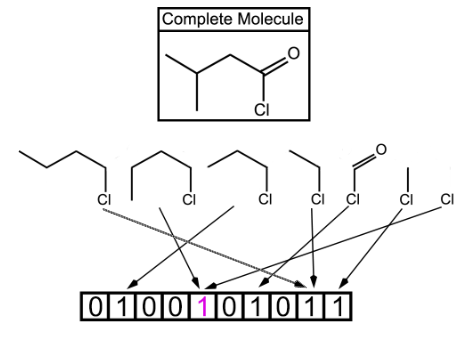

Image from [Chemistry LibreTexts](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors) [Cheminformatics Course](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics)

The exact fingerprint will depend on the algorithm that is used to construct it.
There are many different fingerprinting algorithms. But they tend to fall into two types of groups - similarity or substructure fingerprints. A common similarity fingerprint that is used is the Morgan fingerprint. A common substructure fingerprint that is used is the [Daylight fingerprint](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) (the RDKFingerprint is a Daylight-like fingerprint).

The cell below calculates the RDKit fingerprint for caffeine.

In [61]:
from rdkit.Chem import AllChem

caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
benzene = Chem.MolFromSmiles("c1ccccc1")

caffeine_fingerprint = AllChem.RDKFingerprint(aspirin)

You usually wouldn't interact with a fingerprint directly, but using RDKit we can examine it to understand more about how it works.
We can print the bit string representation using `.ToBitString`.

In [62]:
caffeine_fingerprint.ToBitString()

'000000000000000000000001000000100001000001001000101010000000001000000010001000000001000000011100010000010000100000010000000000000100000000100000010000101000000001110000001001000000000000000000001011000010010011000011100000000100000001000000001100010000000000000100000001000000010000100100000000100000000010000000010000000000001000110001000000101010000000000000001000000000000000000000010010100000100000010001000001000000000010010000100101000101010100000001000001000000010101000101001100000000000000000010001010000100000000100000000000000100000000000100000000010011000000000000000001000000110000001001010001001001000000000000000000010000000000001001101000010110000000000000000010000000001000000010000000001000000000000000100100000000000100010000100001000000100110000110000000000011010010000000101010000000000000000000000000010000001000100100001000000100001100000000000110001000000000010000000001000000000000000100001100000100001101100000001000001010000010100101000000001000101001000000001010100100000

If you print the benzene string, you will see a string of the same length, but with fewer bits set.
There are fewer bits because there are fewer molecular patterns in the smaller molecule.

In [67]:
benzene_fingerprint = AllChem.RDKFingerprint(benzene)
benzene_string = benzene_fingerprint.ToBitString()

print(benzene_string)

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000010000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Using this bit string, we can do a number of different analyses. 
For example, substructure searches using bit strings check that bits that are set in the smaller molecule are also set in the larger target molecule.


<div class="alert alert-block alert-warning"> 
<h3>Exercise</h3>

Fill in the for loop below to check that bits set in the aspiring fingerprint string are also set in the benzene fingerprint string.

</div>

In [ ]:
# TO DO Follow the exercise above
aspirin_fingerprint = AllChem.RDKFingerprint() 
aspirin_string = 
num_bits = len(benzene_string)

for i in range(num_bits):
    if benzene_string[i] == "1":
        print(aspirin_string[i] == benzene_string[i])

The above output tells us that every bit that is set in the benzene fingerprint is also set in the aspirin target. Fingerprint substructure searches are often used for faster, but less accurate substructure searches, and are commonly used for screen large numbers of molecules quickly.

### Measuring Similarity

Because the fingerprints are numbers, we can measure how similar two fingerprints are using different similarity metrics.
One common similarity metric is called the Tanimoto similarity.
 The Tanimoto similarity is calculated as follows:

$$
T(A, B) = \frac{A \cap B}{A + B - A \cap B}
$$

Where:
- $A$ and $B$: are the sets of bits in the fingerprint vectors for molecules $A$ and $B$ respectively.
- $A \cap B$: This represents the intersection of sets $A$ and $B$, i.e., the number of bits that are '1' (set) in both $A$ and $B$.
- $A + B$: This is the sum of all '1' bits in both $A$ and $B$.
- $A + B - A \cap B$: This term represents the union of sets $A$ and $B$, calculated as the total number of unique '1' bits across both fingerprints.

The Tanimoto similarity ranges from 0.0 to 1.0, with 1.0 representing identical fingerprints.

In [70]:
from rdkit import DataStructs

DataStructs.TanimotoSimilarity(benzene_fingerprint, aspirin_fingerprint)

0.03389830508474576

<div class="alert alert-block alert-warning"> 
<h3>Exercise</h3>

Use the Tanimoto similarity to measure if benzene is more similar to pyridine or aniline using the RDKit fingerprint.

</div>

In [ ]:
# TO DO Follow the exercise above
pyridine = Chem.MolFromSmiles("")
pyridine_fingerprint = AllChem.RDKFingerprint()
aniline = Chem.MolFromSmiles("")
aniline_fingerprint = AllChem.RDKFingerprint()

print(f"benzene cf. pyridine CDK fingerprint and Tanimoto coefficient {DataStructs.TanimotoSimilarity(benzene_fingerprint, pyridine_fingerprint)}")
print(f"benzene cf. pyridine CDK fingerprint and Tanimoto coefficient {DataStructs.TanimotoSimilarity(benzene_fingerprint, aniline_fingerprint)}")



## Molecular Descriptors

Molecular descriptors are properties of molecules which can be analyzed using statistical methods to make predictions about molecular properties. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html).
RDKit has a module which can be used to retrieve and calculate molecular descriptors.

To get molecular descriptors from RDKit, we import the `Descriptors` module.

In [72]:
from rdkit.Chem import Descriptors, AllChem, rdFingerprintGenerator

Some molecular descriptors we might be interested in are:

1. Heavy Atom Count (`HeavyAtomCount`)
2. Number of hydrogen bond acceptrs (`NumHAcceptors`)
3. Number of hydrogen bond donors (`NumHDonors`)
4. Number of valence electrons (`NumValenceElectrons`)
5. Molecular weight (`MolWt`)
6. Number of aromatic rings (`NumAromaticRings`)
And many others!

To get the descritpor you're interested in, the syntax is

```python
Descriptors.DescriptorName(molecule_variable)
```

In [73]:
acetic_acid = Chem.MolFromSmiles("CC(=O)O")

In [ ]:
print("Printing info for acetic acid:")
print(f"The molecular weight is {Descriptors.MolWt(acetic_acid)}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings(acetic_acid)}")
print(f"The logP is {Descriptors.MolLogP(acetic_acid)}")
print(f"The Number of Hydrogen Bond Donors is {Descriptors.NumHDonors(acetic_acid)}")
print(f"The Number of Hydrogen Bond Acceptors is {Descriptors.NumHAcceptors(acetic_acid)}")
print(f"The InChi is {Chem.MolToInchi(acetic_acid)}")
print(f"The InChi key is {Chem.MolToInchiKey(acetic_acid)}")
print(f"The Fingerprint is {rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048).GetFingerprint(acetic_acid).ToBitString()}")
acetic_acid

In [ ]:
# TO DO: Calculate the same set of properties for tyrosine

print("Printing info for tyrosine:")
print(f"The molecular weight is {Descriptors.MolWt()}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings()}")
print(f"The logP is {Descriptors.MolLogP()}")
print(f"The Number of Hydrogen Bond Donors is {Descriptors.NumHDonors()}")
print(f"The Number of Hydrogen Bond Acceptors is {Descriptors.NumHAcceptors()}")
print(f"The InChi is {Chem.MolToInchi()}")
print(f"The InChi key is {Chem.MolToInchiKey()}")
print(f"The Fingerprint is {rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048).GetFingerprint().ToBitString()}")
tyrosine